# LOGISTIC REGRESSION--Heart Dataset

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix,multilabel_confusion_matrix

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

import pickle
import json

# Problem Statement

# Data Gathering

In [3]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# EDA AND FEATURE ENGINEERING :-

In [4]:
df.info()  # no object column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.isna().sum()  # no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# df['oldpeak'].unique()

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

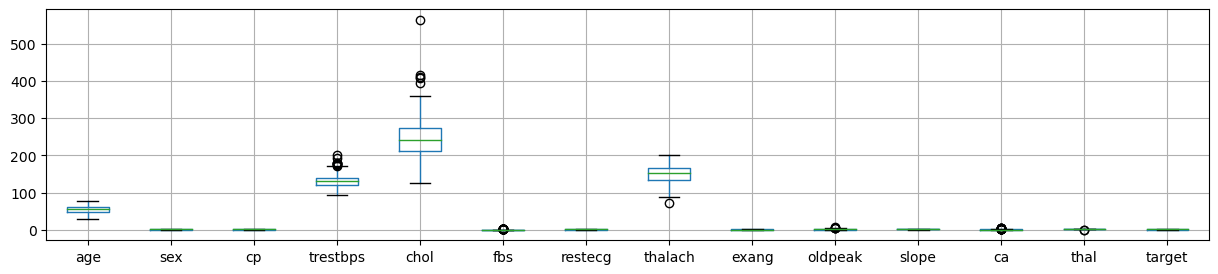

In [9]:
plt.figure(figsize=(15,3))
df.boxplot()

# 1.age

In [10]:
# df['age']

In [11]:
# df['age'].isna().sum()

<AxesSubplot:xlabel='age'>

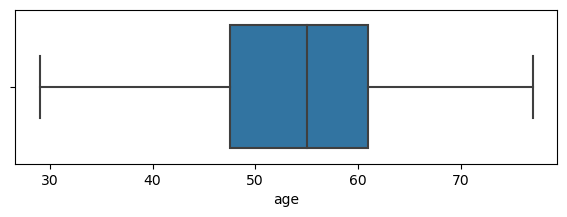

In [12]:
# checking for outlires directly

plt.figure(figsize=(7,2))
sns.boxplot(x = df['age']) 

# 2.sex

In [13]:
# df['sex']

<AxesSubplot:xlabel='sex'>

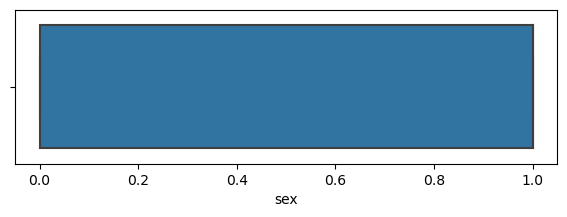

In [14]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['sex']) 

## 3.cp 

In [15]:
# df['cp']

<AxesSubplot:xlabel='cp'>

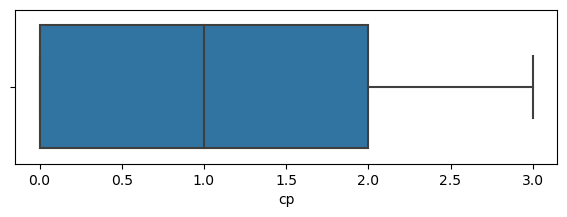

In [16]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['cp']) 

In [17]:
# df.info()

## 4.trestbps

In [18]:
# df['trestbps']

<AxesSubplot:xlabel='trestbps'>

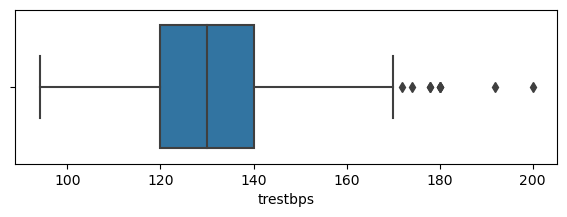

In [19]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['trestbps']) 

In [20]:
q1 = df['trestbps'].quantile(0.25)
q2 = df['trestbps'].quantile(0.50)
q3 = df['trestbps'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

upper_tail : 170.0
lower_tail : 90.0


In [21]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [22]:
df["trestbps"].loc[(df["trestbps"]>upper_tail)|(df["trestbps"]<lower_tail)]

8      172
101    178
110    180
203    180
223    200
241    174
248    192
260    178
266    180
Name: trestbps, dtype: int64

In [23]:
df["trestbps"].loc[(df["trestbps"]<=upper_tail)&
                                             (df["trestbps"]>=lower_tail)].mean()

130.0952380952381

In [24]:
# df.loc[(df['trestbps'] > upper_tail),'trestbps'] = upper_tail

df.loc[(df['trestbps'] > upper_tail),'trestbps'] = 130.0952380952381

<AxesSubplot:xlabel='trestbps'>

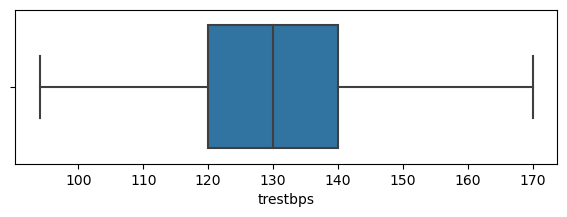

In [25]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['trestbps']) 

In [26]:
# df.info()

## 5.chol

In [27]:
# df['chol']

<AxesSubplot:xlabel='chol'>

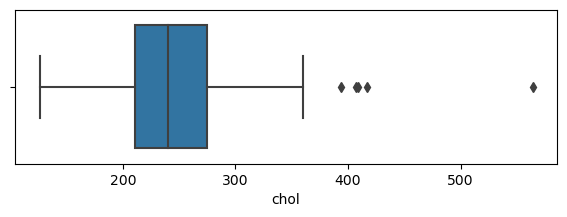

In [28]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['chol']) 

In [29]:
q1 = df['chol'].quantile(0.25)
q2 = df['chol'].quantile(0.50)
q3 = df['chol'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

upper_tail : 369.75
lower_tail : 115.75


In [30]:
df['chol'].loc[(df['chol']>upper_tail)|(df['chol']<lower_tail)]

28     417
85     564
96     394
220    407
246    409
Name: chol, dtype: int64

In [31]:
df['chol'].loc[(df['chol']<=upper_tail) & (df['chol']>=lower_tail)].mean()

243.04362416107384

In [32]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [33]:
df.loc[(df['chol'] > upper_tail),'chol'] = upper_tail

<AxesSubplot:xlabel='chol'>

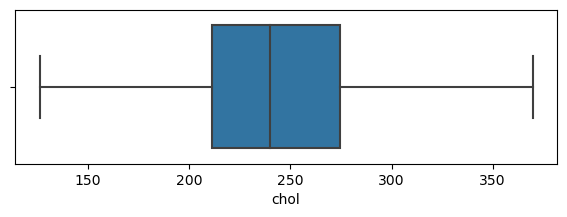

In [34]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['chol']) 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


## 6.fbs 

In [36]:
df['fbs']

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64

In [37]:
df['fbs'].unique()

array([1, 0], dtype=int64)

## 7.restecg

In [38]:
df['restecg']

0      0
1      1
2      0
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: restecg, Length: 303, dtype: int64

In [39]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

## 8.thalach

In [40]:
df['thalach']

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64

In [41]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

<AxesSubplot:xlabel='thalach'>

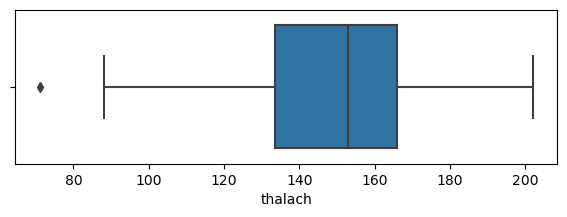

In [42]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['thalach']) 

In [43]:
q1 = df['thalach'].quantile(0.25)
q2 = df['thalach'].quantile(0.50)
q3 = df['thalach'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

upper_tail : 214.75
lower_tail : 84.75


In [44]:
df.loc[(df['thalach'] < lower_tail),'thalach'] = lower_tail

<AxesSubplot:xlabel='thalach'>

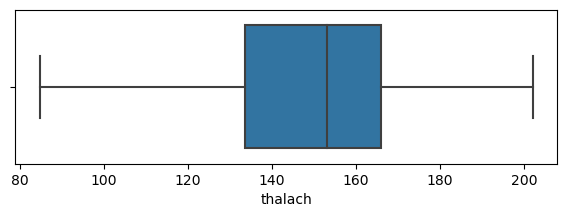

In [45]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['thalach']) 

In [46]:
# df.info()


## 9.exang

In [47]:
df['exang'].unique()

array([0, 1], dtype=int64)

## 10.oldpeak

In [48]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

<AxesSubplot:xlabel='oldpeak'>

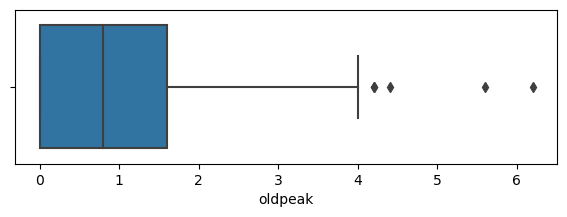

In [49]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['oldpeak']) 

In [50]:
q1 = df['oldpeak'].quantile(0.25)
q2 = df['oldpeak'].quantile(0.50)
q3 = df['oldpeak'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

upper_tail : 4.0
lower_tail : -2.4000000000000004


In [51]:
# might be correct values...

# df.loc[(df['oldpeak'] > upper_tail),'oldpeak'] = upper_tail

## 11.slope

In [52]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

## 12.ca

In [53]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

## 13.thal

In [54]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

## 14.target

In [55]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

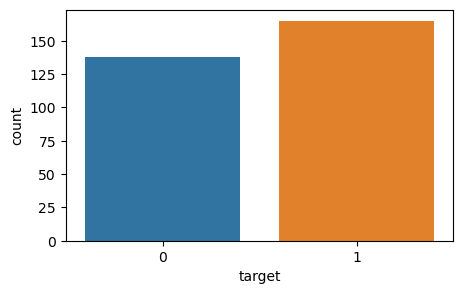

In [56]:
plt.figure(figsize=(5,3))
sns.countplot(x = df['target'])

# Model Training

In [57]:
# Train test split

x = df.drop('target', axis = 1)
y = df['target']

x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.20, random_state= 20, stratify=y)

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

# Model Evaluation

### For testing data

In [58]:
y_pred_test = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("*"*60)

multi_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred_test)
print("Multilabel Confusion Matrix\n",multi_cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on testing data : ",accuracy)
print("*"*60)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n",clf_report)

************************************************************
Multilabel Confusion Matrix
 [[[30  3]
  [ 6 22]]

 [[22  6]
  [ 3 30]]]
************************************************************
Accuracy on testing data :  0.8524590163934426
************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# For trainin data

In [59]:
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*60)

multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("Multilabel Confusion Matrix\n",multi_cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy on training data: ",accuracy)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[ 85  25]
 [ 10 122]]
************************************************************
Multilabel Confusion Matrix
 [[[122  10]
  [ 25  85]]

 [[ 85  25]
  [ 10 122]]]
************************************************************
Accuracy on training data:  0.8553719008264463
************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       110
           1       0.83      0.92      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242



# Testing on user entered values

In [62]:
x.head(1).T


,0
age,63.0
sex,1.0
cp,3.0
trestbps,145.0
chol,233.0
fbs,1.0
restecg,0.0
thalach,150.0
exang,0.0
oldpeak,2.3


In [63]:
age = 63.0
sex = 1.0
cp = 3.0
trestbps = 145.0
chol = 233.0
fbs = 1.0
restecg = 0.0
thalach = 150.0
exang = 0.0
oldpeak = 2.3
slope = 0.0
ca = 0.0
thal = 1.0

In [65]:
array = np.zeros(len(x.columns))  
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [66]:
array[0] = age 
array[1] = sex
array[2] = cp
array[3] = trestbps
array[4] = chol
array[5] = fbs
array[6] = restecg
array[7] = thalach
array[8] = exang
array[9] = oldpeak
array[10] = slope 
array[11] = ca 
array[12] = thal

array

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [68]:
prediction = logistic_model.predict([array])[0]
if prediction == 1:
    print("Yes,You may have Heart Related Problem.")
    
else:
     print("No,You may not have Heart Related Problem.")

Yes,You may have Heart Related Problem.


In [69]:
with open("logistc_model_Heart_Dataset.pkl", "wb") as f:
    pickle.dump(logistic_model, f)   

column_names = x.columns

save_data = {"column":list(column_names)}

with open("Project_Data_Heart_Dataset.json", "w") as f:
    json.dump(save_data, f)